Итерация [0 / 300], Ошибка : 0.1675
Итерация [10 / 300], Ошибка : 0.0048
Итерация [20 / 300], Ошибка : 0.0578
Итерация [30 / 300], Ошибка : 0.0147
Итерация [40 / 300], Ошибка : 0.0011
Итерация [50 / 300], Ошибка : 0.0121
Итерация [60 / 300], Ошибка : 0.0001
Итерация [70 / 300], Ошибка : 0.0143
Итерация [80 / 300], Ошибка : 0.0035
Итерация [90 / 300], Ошибка : 0.0004
Итерация [100 / 300], Ошибка : 0.0661
Итерация [110 / 300], Ошибка : 0.0816
Итерация [120 / 300], Ошибка : 0.0058
Итерация [130 / 300], Ошибка : 0.0758
Итерация [140 / 300], Ошибка : 0.0037
Итерация [150 / 300], Ошибка : 0.0641
Итерация [160 / 300], Ошибка : 0.1723
Итерация [170 / 300], Ошибка : 0.0179
Итерация [180 / 300], Ошибка : 0.1467
Итерация [190 / 300], Ошибка : 0.0338
Итерация [200 / 300], Ошибка : 0.0794
Итерация [210 / 300], Ошибка : 0.0002
Итерация [220 / 300], Ошибка : 0.0153
Итерация [230 / 300], Ошибка : 0.0475
Итерация [240 / 300], Ошибка : 0.0174
Итерация [250 / 300], Ошибка : 0.0114
Итерация [260 / 300], О

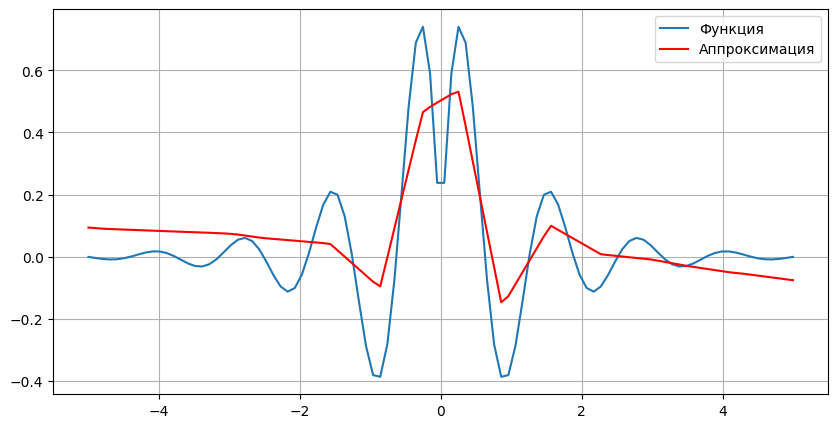

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(np.abs(5 * X)) * np.exp(-np.abs(X))


X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 60)
        self.fc2 = nn.Linear(60, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)


iterations = 300
for epoch in range(iterations):

    indices = torch.randperm(X_tensor.size(0))
    for idx in range(0, X_tensor.size(0)):
        ind = random.randint(min(indices), max(indices))
        batch_X, batch_y = X_tensor[ind], y_tensor[ind]
        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Итерация [{epoch} / {iterations}], Ошибка : {loss.item():.4f}')

with torch.no_grad():
    predicted = net(X_tensor).numpy()

plt.figure(figsize=(10, 5))
plt.plot(X, y, label='Функция')
plt.plot(X, predicted, 'r', label='Аппроксимация')
plt.grid(True)
plt.legend()
plt.show()

